# Projeto de Análise de Dados Pluviométricos (1965-2002)

Este projeto visa analisar dados pluviométricos de um período abrangente, de 1965 a 2002. Abordaremos várias etapas fundamentais para compreender e extrair insights valiosos:

## Objetivos do Projeto

1. **Unificação de Datasets:** Combinação de múltiplos conjuntos de dados em um arquivo coeso.
2. **Gestão de Dados Ausentes:** Identificação e compreensão de dados faltantes.
3. **Visualização de Dados Ausentes:** Criação de gráficos para representar as porcentagens de dados ausentes.
4. **Técnicas de Preenchimento de Dados Ausentes:** Aplicação de métodos para preencher lacunas nos dados.
5. **Análise Exploratória de Dados (EDA):** Utilização de gráficos univariados, multivariados e matriz de correlação.
6. **Interpretação da EDA:** Observações e conclusões resultantes da Análise Exploratória de Dados.
7. **Definição da Questão de Negócio:** Identificação da pergunta central que orientará todo o projeto.
8. **Natureza do Problema:** Classificação, clustering, regressão, séries temporais ou outro tipo de problema.
9. **Modelagem:** Desenvolvimento e comparação de pelo menos dois modelos para análise de desempenho.
10. **Avaliação de Performance Técnica:** Utilização de métricas específicas (MAPE, RMSE, ROC...) para avaliar os modelos.
11. **Proposta de Melhorias:** Sugestões para aprimorar o processo de análise.

## Metodologia e Abordagem

O projeto será conduzido por meio de uma abordagem sistemática e focada em cada etapa, utilizando as melhores práticas e técnicas de análise de dados.

Estamos comprometidos em explorar, compreender e extrair insights valiosos a partir desses dados pluviométricos, buscando contribuir para uma visão mais clara e fundamentada sobre o comportamento das chuvas nesse período.


In [614]:
#Importação das bibliotecas.

#Para manipulação
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot

#Para Visualização.
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import mplcursors

#Para Analises e Modelos.
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pmdarima import auto_arima

#configurações.
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2f}'.format)








#### 1. Unificação de Datasets: Combinação de múltiplos conjuntos de dados em um arquivo coeso.

In [615]:
#Carregamento das bases e unificação.

df1 = pd.read_csv('data/data_1965_to_1982.csv',parse_dates=True)
df2 = pd.read_csv('data/data_1982_to_2002.csv',parse_dates=True)

# Concatenando.
df = pd.concat([df1,df2], ignore_index=True)


In [616]:
df.set_index('Year')
df_est = df.copy()
#Estatisticas básicas.
std = df_est.std(axis=1 )
mean = df_est.mean(axis=1)
estatistica = pd.DataFrame([std, mean])
estatistica = estatistica.T
estatistica.columns = ['Std', 'Mean']
df_est[['Std', 'Mean']] = estatistica
df_est

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Std,Mean
0,1965,0.03,0.07,0.00,21.67,17.86,102.11,606.07,402.52,69.51,5.25,16.23,22.07,548.15,248.34
1,1966,0.91,0.00,0.00,2.98,63.01,94.09,NaN,59.39,150.62,1.31,41.21,4.13,558.61,198.64
2,1967,0.25,3.39,1.32,13.48,11.12,251.31,780.01,181.07,183.76,50.40,8.39,37.69,553.40,268.40
3,1968,0.32,3.04,1.70,23.31,7.44,179.87,379.35,171.98,219.88,74.00,23.33,2.02,533.56,234.94
4,1969,0.25,2.52,0.33,4.57,6.21,393.68,678.35,397.33,205.41,24.01,24.39,1.95,550.44,285.23
5,1970,0.07,0.00,0.00,16.22,68.04,300.55,330.50,283.48,158.64,115.76,0.26,0.00,531.90,249.50
6,1971,0.00,0.00,0.00,0.81,57.69,297.19,122.19,372.69,286.06,39.42,0.55,0.00,536.31,242.12
7,1972,0.00,0.03,0.00,5.98,19.10,132.41,338.48,68.74,120.42,1.08,24.09,0.14,539.10,206.34
8,1973,0.00,2.97,0.23,3.92,14.98,304.48,696.02,256.93,183.21,101.81,5.52,0.00,548.82,272.54
9,1974,0.00,0.00,6.43,16.86,51.21,148.70,405.36,NaN,288.53,188.88,0.26,0.00,557.13,256.69


In [617]:
#Limpando duplicatas e confirmando a coluna Year.
df = df.drop_duplicates().reset_index(drop=True)
lista = df['Year'].unique()
comparador = np.arange(1965,2003)
comparacao = lista == comparador
diferenca = lista[~comparacao]
diferenca #Aqui vemos que a coluna ano está de sem anos faltantes.

df.describe()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,38.00,37.00,37.00,38.00,38.00,38.00,38.00,36.00,36.00,38.00,38.00,38.00,38.00
mean,1983.50,0.30,1.12,1.68,12.38,25.06,337.10,424.11,276.73,201.11,73.25,25.22,6.07
std,11.11,0.65,1.76,2.49,13.67,22.45,171.67,180.65,135.69,123.74,62.94,31.81,11.73
min,1965.00,0.00,0.00,0.00,0.06,0.51,94.09,84.94,59.39,44.57,1.08,0.26,0.00
25%,1974.25,0.00,0.00,0.00,2.29,7.01,226.18,311.05,180.12,105.94,21.97,3.73,0.00
50%,1983.50,0.01,0.17,0.60,5.49,18.14,312.10,406.30,234.98,180.97,49.83,14.69,0.50
75%,1992.75,0.25,2.12,2.08,19.80,33.07,412.57,548.68,402.94,242.43,115.66,37.01,4.15
max,2002.00,3.01,8.41,9.62,53.27,80.54,773.74,780.01,541.58,613.52,225.90,122.81,37.69


#### 2. **Gestão de Dados Ausentes:** Identificação e compreensão de dados faltantes.
#### 3. **Visualização de Dados Ausentes:** Criação de gráficos para representar as porcentagens de dados ausentes.
#### 4. **Técnicas de Preenchimento de Dados Ausentes:** Aplicação de métodos para preencher lacunas nos dados.

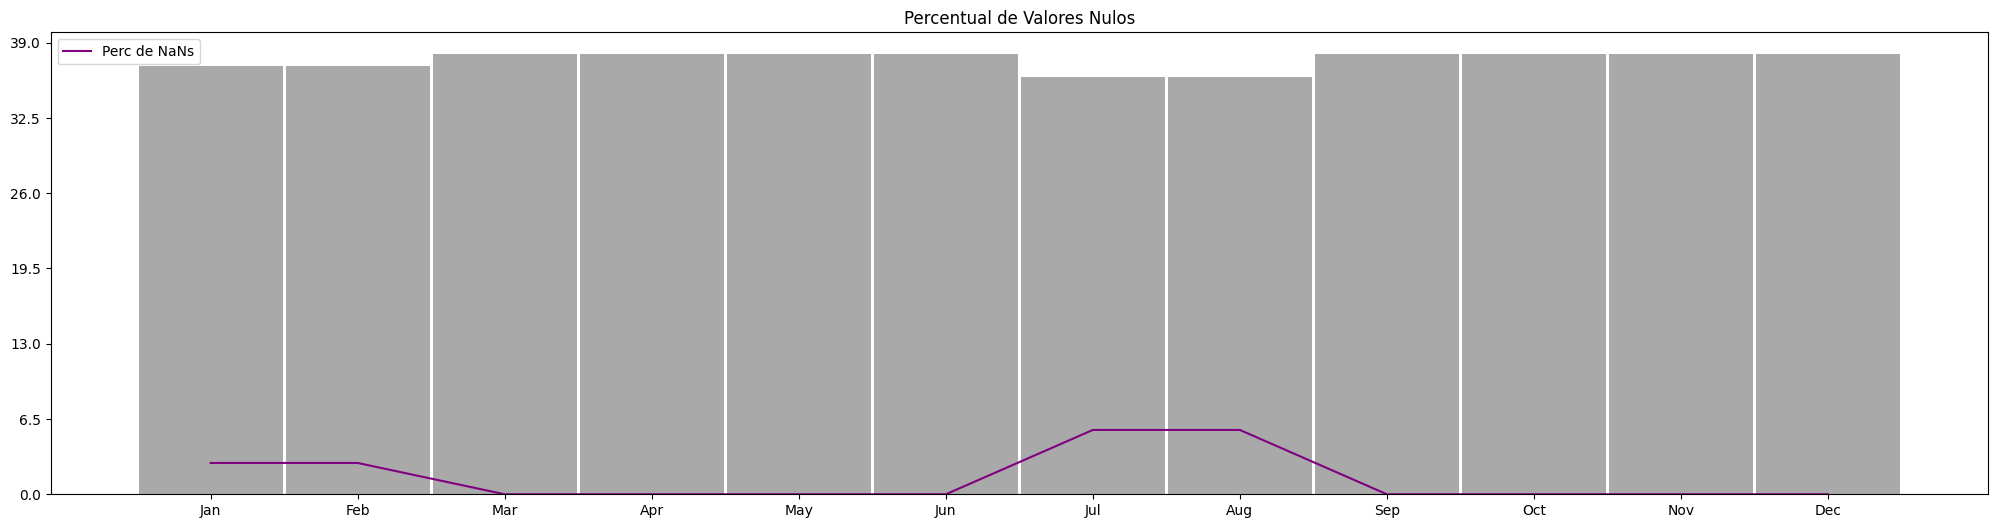

In [618]:
#Realizando a contagem dos dados por coluna para correta identificação de NaNs
df.describe()
#Contando valores totais e NaNs.
df_aux = df.copy()
df_aux.drop('Year',axis=1,inplace=True)
percentual_NaNs = []
cont_linha = []
for i in df_aux.columns:
    nans_contagens = df_aux[i].isna().values.astype(int).sum()
    df_contagem = len(df_aux[i].dropna())
    percentil = (nans_contagens / df_contagem) * 100
    percentual_NaNs.append(percentil)

for k in df_aux.columns:
    linhas_com_dado = df_aux[k].notnull().sum()
    cont_linha.append(linhas_com_dado)
        
#Exibindo Gráficos.
eixo_y = [0,3,6,35,37,39]
columns_names = [i for i in df.columns[1:]]
fig, ax = plt.subplots(figsize=(25,6))
gap = np.abs(max(eixo_y) - min(eixo_y)) / 6
ticks_y = np.arange(min(eixo_y), max(eixo_y) + gap, gap)
plt.title("Percentual de Valores Nulos")
ax.bar(columns_names,cont_linha, width=0.98 ,color='darkgray')
ax.plot(percentual_NaNs, color='purple', label='Perc de NaNs')
ax.legend()
ax.set_yticks(ticks_y);


In [619]:
#Corrigindo a tabela inserindo as médias das colunas para não gerar ruídos.
for i in df.columns:
    df[i].fillna(df[i].mean(), inplace=True)
    
df.describe() #Valores preenchidos.

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,38.00,38.00,38.00,38.00,38.00,38.00,38.00,38.00,38.00,38.00,38.00,38.00,38.00
mean,1983.50,0.30,1.12,1.68,12.38,25.06,337.10,424.11,276.73,201.11,73.25,25.22,6.07
std,11.11,0.64,1.74,2.49,13.67,22.45,171.67,175.70,131.97,123.74,62.94,31.81,11.73
min,1965.00,0.00,0.00,0.00,0.06,0.51,94.09,84.94,59.39,44.57,1.08,0.26,0.00
25%,1974.25,0.00,0.00,0.00,2.29,7.01,226.18,322.46,183.15,105.94,21.97,3.73,0.00
50%,1983.50,0.01,0.25,0.60,5.49,18.14,312.10,415.08,248.00,180.97,49.83,14.69,0.50
75%,1992.75,0.29,1.95,2.08,19.80,33.07,412.57,535.82,401.22,242.43,115.66,37.01,4.15
max,2002.00,3.01,8.41,9.62,53.27,80.54,773.74,780.01,541.58,613.52,225.90,122.81,37.69


#### 5. **Análise Exploratória de Dados (EDA):** Utilização de gráficos univariados, multivariados e matriz de correlação.

In [620]:
df.set_index('Year', inplace=True)

- Experimentando heatmap

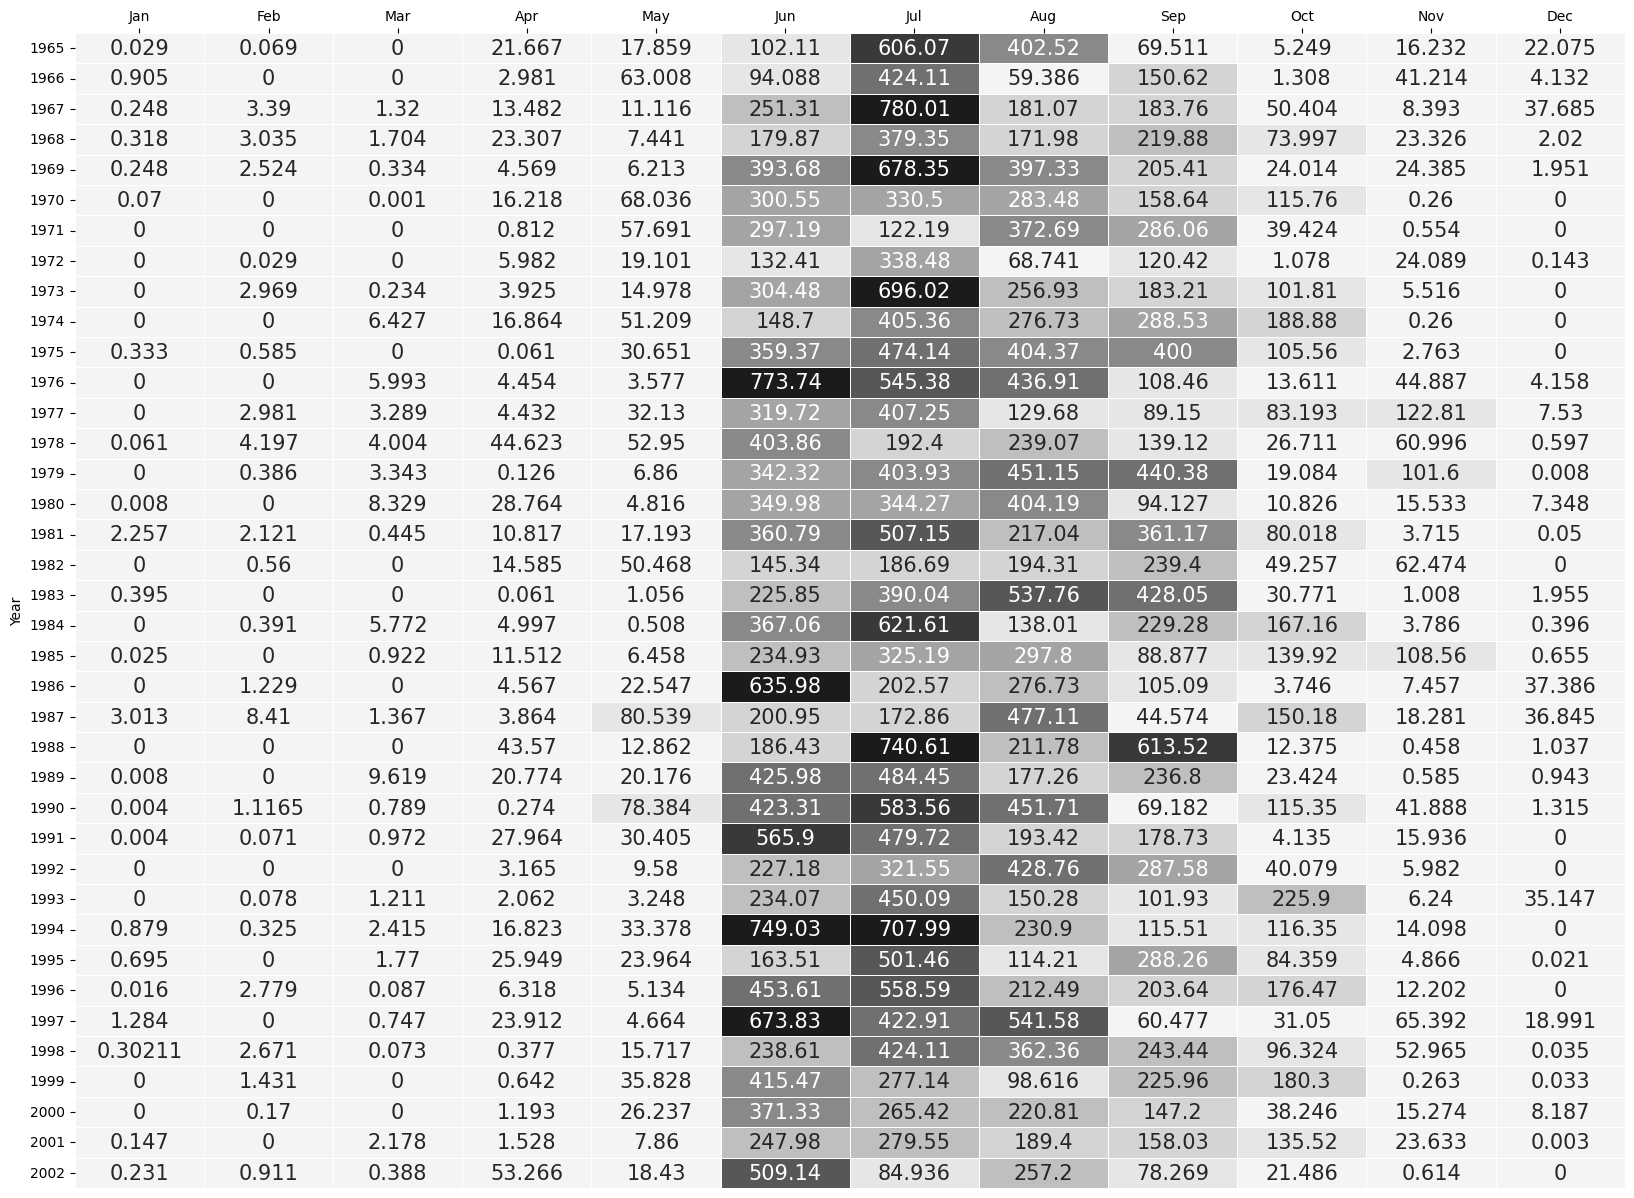

In [621]:
# Definindo uma paleta de cores personalizada
custom_palette = sns.color_palette('Greys', 10)

plt.figure(figsize=(20, 15))
plt.gca().xaxis.set_ticks_position('top')
sns.heatmap(df, annot=True, annot_kws={"size": 15},fmt='.5g' , linewidths=0.5, cbar=False,
            vmin=0,vmax=700, cmap=custom_palette);

In [622]:
#Visualização da evolução das chuvas no período observado.
df_sum = df.copy()
df_sum['soma'] = df.sum(axis=1)

#Comparando com a quadra chuvosa.
df_quadra = df[['Jun', 'Jul', 'Aug', 'Sep', 'Oct']]
df_quadra['soma'] = df_quadra.sum(axis=1)

#Representação da quadra no ano.
perc_quadra = df_quadra['soma'] / df_sum['soma'] * 100
perc_quadra = perc_quadra.to_frame()
perc_quadra.columns = ['Representatividade (%)']

#Media de chuvas nos anos
mean_chuvas = df_sum['soma'].mean()
std_chuvas = df_sum['soma'].std()
mean_chuvas = round(mean_chuvas,2)

fig = px.line()

# Adicionando linha para 'Anual'
fig.add_scatter(x=df_sum.index, y=df_sum['soma'], mode='lines+markers', name='Anual', line=dict(color='cyan', dash='solid', width=2, shape='spline'))

# Adicionando linha para 'Quadra Chuvosa'
fig.add_scatter(x=df_quadra.index, y=df_quadra['soma'], mode='lines+markers', name='Quadra Chuvosa', line=dict(color='red', dash='dash', width=2, shape='linear'))

fig.add_hline(mean_chuvas, name='Média de Chuvas', line=dict(color='purple', width=1))

# Layout do gráfico
fig.update_layout(
    title='Volume total de chuvas (Por Ano)',
    xaxis_title='Anos',
    yaxis_title='Volume (cm³)',
    xaxis=dict(tickmode='array', tickvals=df_sum.index, ticktext=df_sum.index, tickangle=0),
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
    width=25*60,
    plot_bgcolor='white'
)

# Adicionar anotação para exibir o valor da média
fig.add_annotation(
    x=df_sum.index[0], 
    y=mean_chuvas, 
    text=f'Média: {mean_chuvas}',  
    showarrow=True,
    arrowhead=1, 
    ax=20,  
    ay=-60)

fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False)

fig.show()



In [623]:
# Criando o gráfico com Plotly Express para expressar a reprentatividade da quadra chuvosa dentro das chuvas anuais.
fig = px.line(x=df.index, y=perc_quadra['Representatividade (%)'])

fig.add_scatter(x=df.index, y=perc_quadra['Representatividade (%)'].round(0), fill='tozeroy', fillcolor='rgba(60, 0, 60, 0.35)', line=dict(color='lightgray', width=0.8))

# Ajustando o layout do gráfico
fig.update_layout(
    title='Representatividade da Quadra Chuvosa',
    xaxis_title='Anos',
    yaxis_title='Representatividade (%)',
    xaxis=dict(tickmode='array', tickvals=df.index,ticktext=df.index, tickangle=0),
    width=25*58
)

fig.show()

In [624]:
df.reset_index(inplace=True)

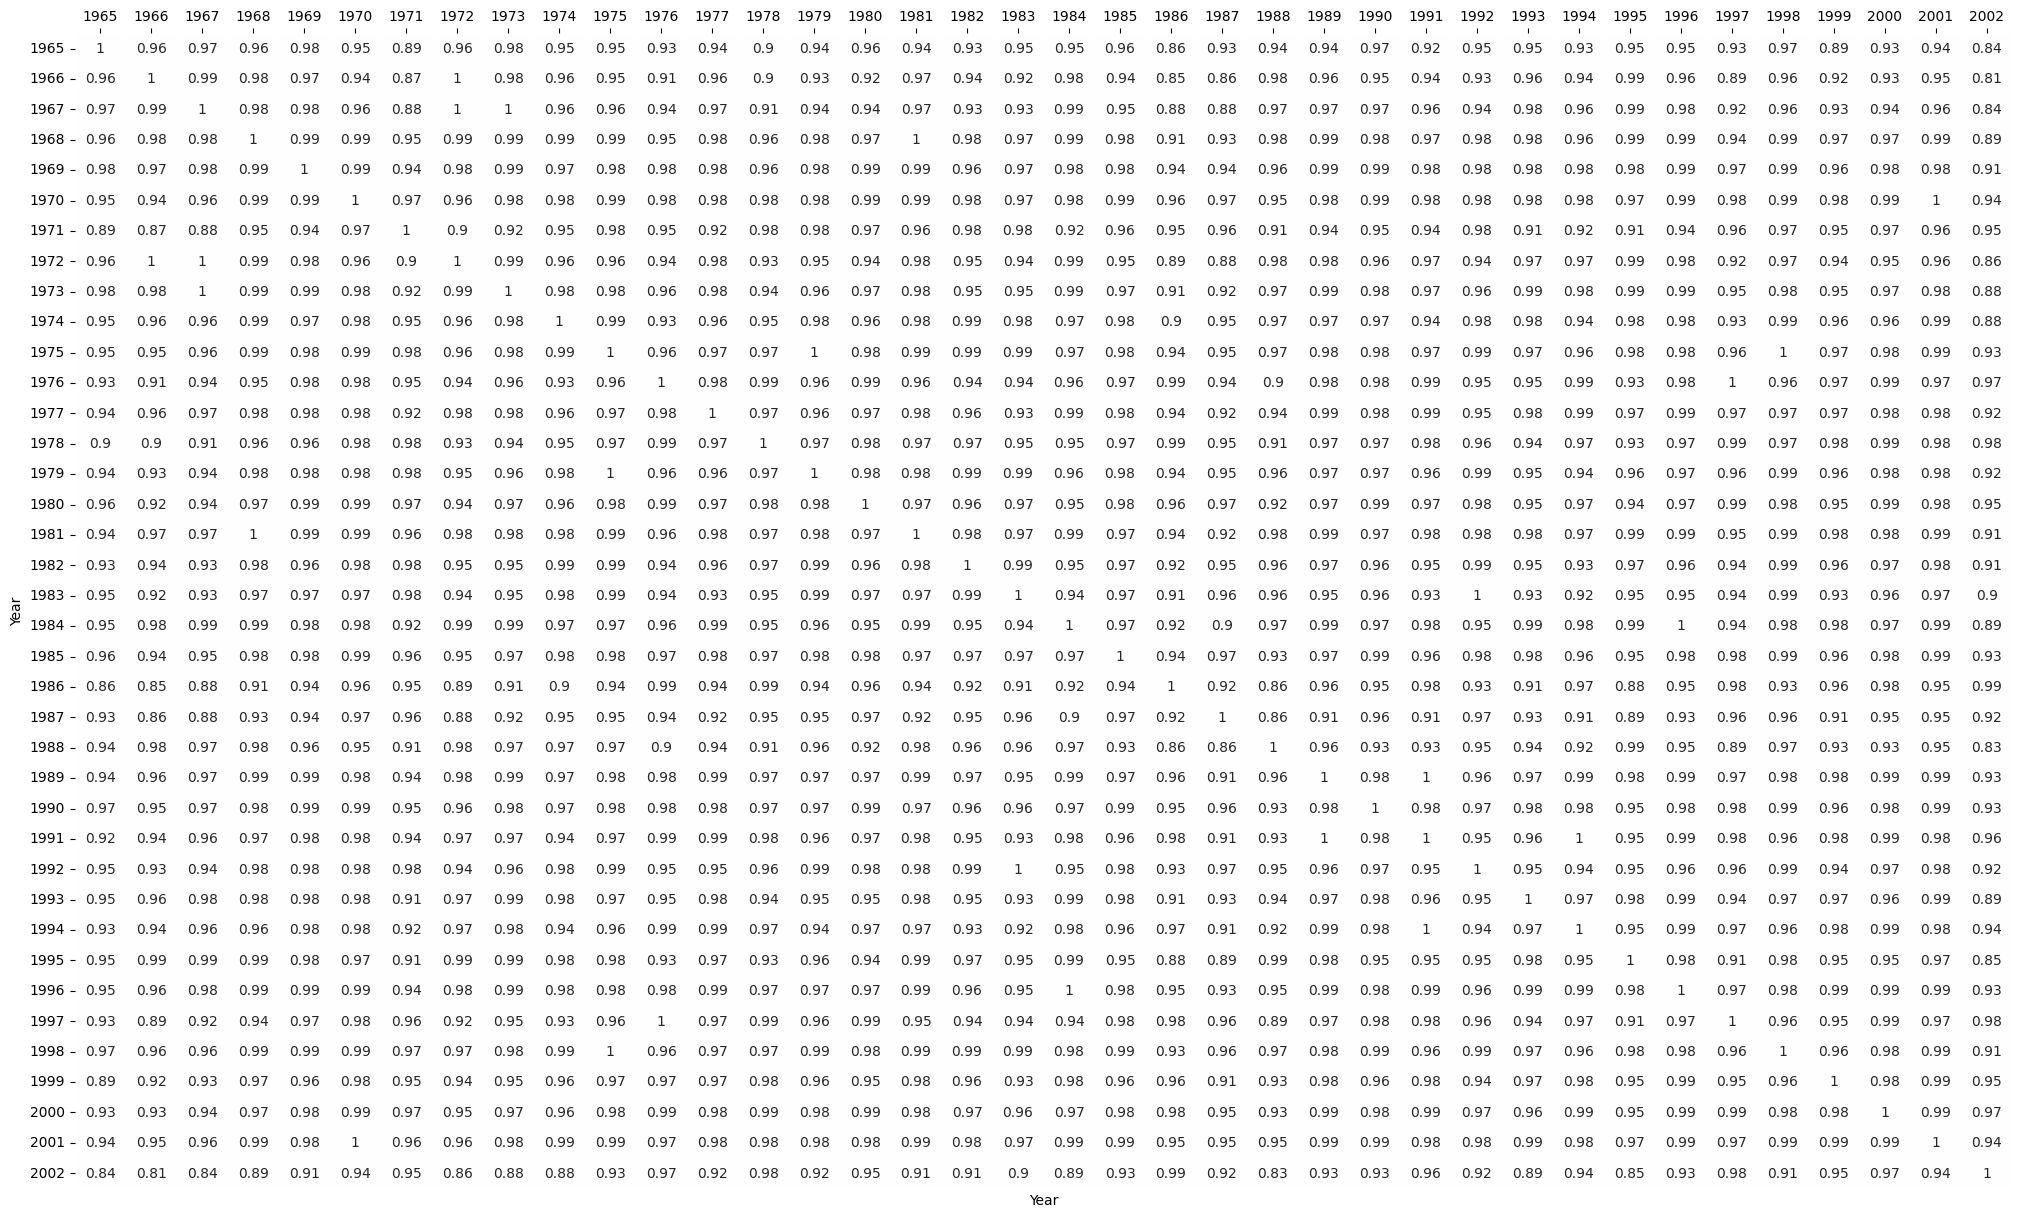

In [625]:
#Criação da Matriz de Correlação.
matriz_corr = df_sum.T.corr().round(2)

custom_palette = sns.color_palette('Greys', 100)

plt.figure(figsize=(25, 15))
plt.gca().xaxis.set_ticks_position('top')
sns.heatmap(matriz_corr, annot=True, annot_kws={"size": 10},fmt='.5g' , linewidths=0.5, cbar=False,
            vmin=0,vmax=700, cmap=custom_palette);

# 6. **Interpretação da EDA:** Observações e conclusões resultantes da Análise Exploratória de Dados.

#### Com base na análise dos dados de volume de chuvas no país X, concluímos que a presença de valores NaNs não compromete significativamente a análise, dado que sua ocorrência se limita a no máximo 5% em um determinado ano da amostra. A amostra é robusta e balanceada, representando de forma consistente o volume de chuvas ao longo dos anos.

#### Observamos que a maior parte das chuvas anuais concentra-se na quadra chuvosa, entre junho e outubro, abrangendo no mínimo 85% do total anual de chuvas. A média anual de 1384,12 cm³ é um indicativo relevante, porém, é crucial estar atento ao desvio padrão de 310,83 cm³, sinalizando uma considerável variação entre anos, entre aqueles considerados bons e ruins em termos de precipitação.

#### Além disso, a matriz de correlação apresentou resultados consistentes, com correlações positivas e significativas acima de 80% em todos os casos analisados, evidenciando uma forte associação entre as variáveis estudadas.

#### 7. **Definição da Questão de Negócio:** Identificação da pergunta central que orientará todo o projeto.

    - Como a variação sazonal e a consistência das chuvas durante a quadra chuvosa afetam a estabilidade e a previsibilidade do volume anual de chuvas no país X?

#### 8. **Natureza do Problema:** Classificação, clustering, regressão, séries temporais ou outro tipo de problema.

    - Séries Temporais, Regressão.

#### 9. **Modelagem:** Desenvolvimento e comparação de pelo menos dois modelos para análise de desempenho.
#### 10. **Avaliação de Performance Técnica:** Utilização de métricas específicas (MAPE, RMSE, ROC...) para avaliar os modelos.

In [626]:
df_sum.reset_index(inplace=True)

In [651]:
df_aux = df_quadra[['soma']].T
df_aux_arima = df_aux.copy()
#Iniciando o tratamento da base.
X = df_aux_arima.values[0]
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:]
columns_names = df_aux_arima.iloc[:,size:].columns

In [628]:
#ARIMA
#Aqui fazemos a previsão para os próximos períodos, no caso, a variável n_per representa quantas previsões iremos realizar.
#Nesse exemplo n_per serão a quantidade de anos vindouros onde aplicaremos o modelo para previsão da quadra chuvosa.
list_x = [x for x in X]
list_predict = list()
list_observ = list()
n_per = 3
for p in range(n_per):
    model_arima = sm.tsa.ARIMA(list_x, order=(3,2,0)).fit()
    forecast = model_arima.forecast()
    yhat = forecast[0]
    list_predict.append(yhat.round(2))
    list_x.append(yhat)
    print(f'Previsões: {yhat.round(2)}')

Previsões: 823.14
Previsões: 754.81
Previsões: 678.17


In [629]:
df_aux_arima[['T + 1', 'T + 2', 'T + 3']] = list_predict
A = df_aux_arima.iloc[:,0:(df_aux_arima.shape[1] - 3)]
B = df_aux_arima.iloc[:,(df_aux_arima.shape[1] - 3):]

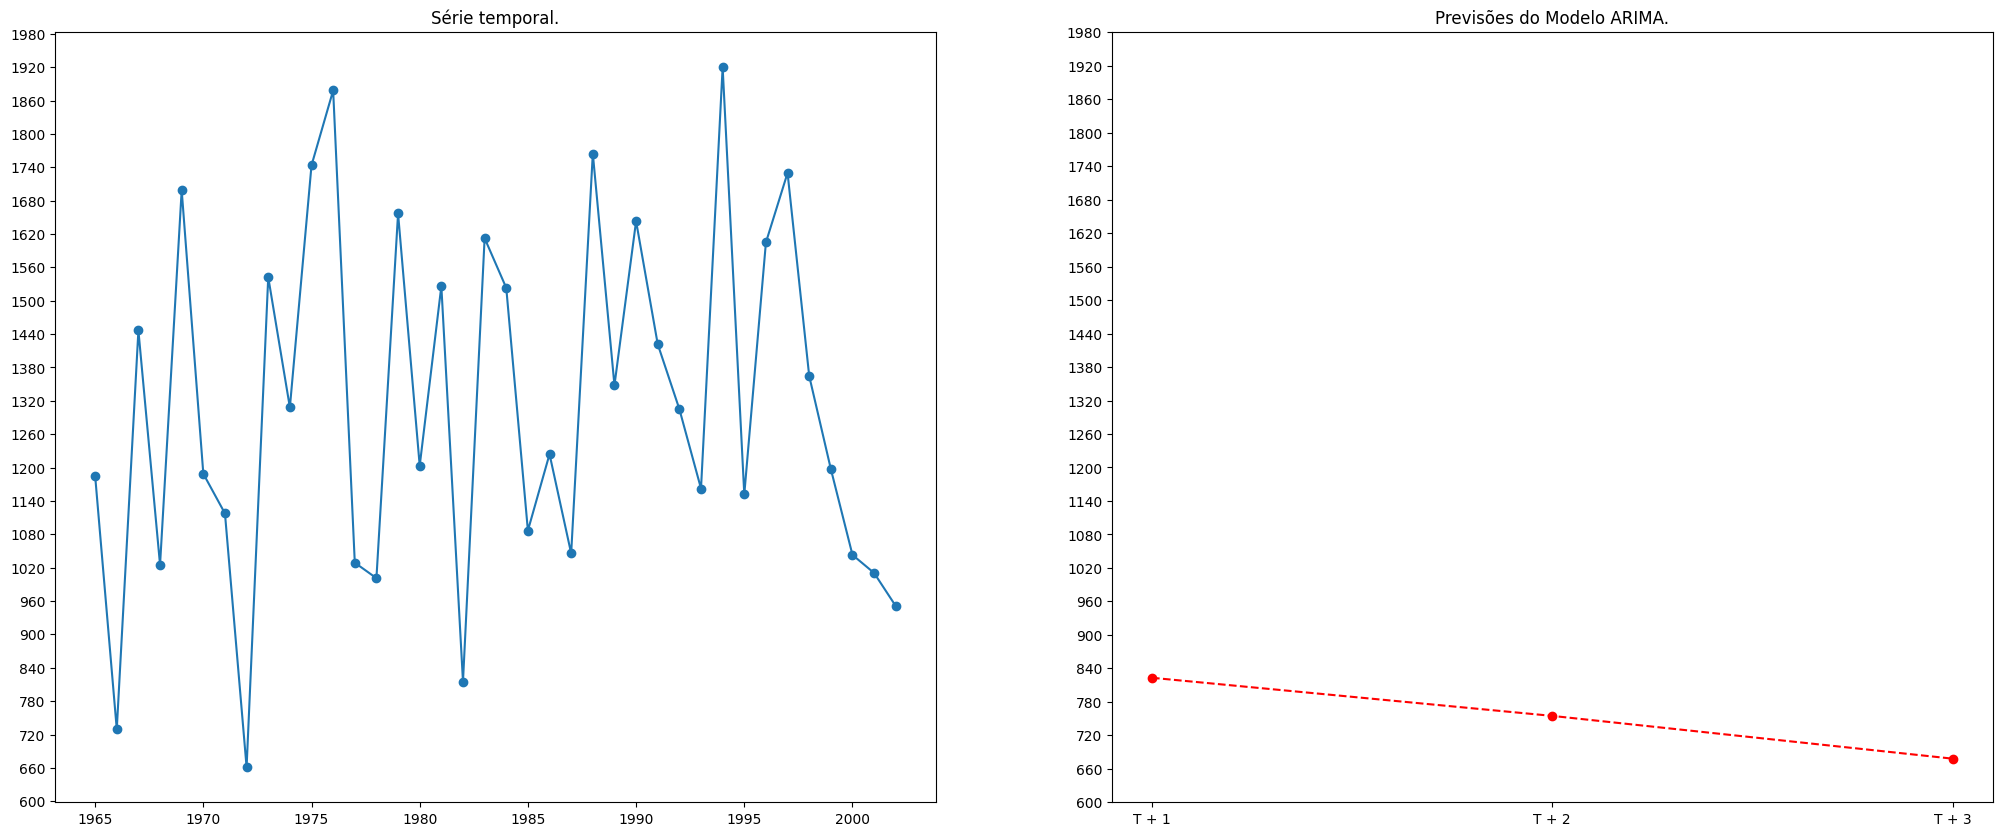

In [630]:
y_tick = [x for x in range(600, 2000, 60)]
x_tick = [y for y in range(1965, 2008, 10)]
fig, ax = plt.subplots(1,2,figsize=(25,10))
ax[0].plot(A.iloc[0], label='Série temporal.', marker='o')
ax[0].set_title('Série temporal.')
ax[0].set_yticks(y_tick)

ax[1].plot(B.iloc[0], label='Prévisão', color='red', marker='o', linestyle='dashed')
ax[1].set_title('Previsões do Modelo ARIMA.')
ax[1].set_yticks(y_tick);

Previsão: 1616.09, Real: 1151.8
Previsão: 1543.68, Real: 1604.8
Previsão: 1400.46, Real: 1729.85
Previsão: 1886.73, Real: 1364.84
Previsão: 1420.03, Real: 1197.49
Previsão: 1320.38, Real: 1043.0
Previsão: 896.91, Real: 1010.48
Previsão: 744.87, Real: 951.04
Root Mean Squared Error (RMSE): 312.656
R² score: -0.3696656835170278


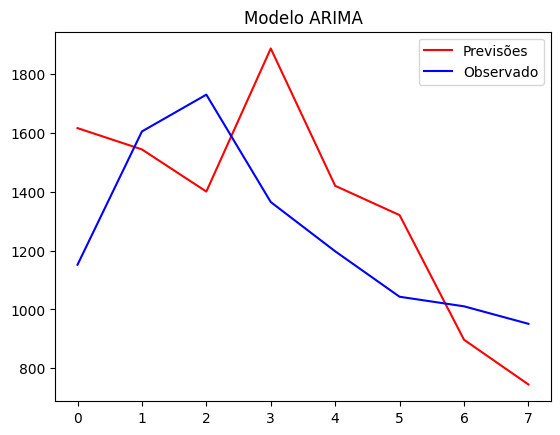

In [655]:
#Usando o ARIMA.
p = 5 #Escolhi baseado nos lags de autocorrelação.
d = 1
q = 1
x_aux = [x for x in train]
pred_arima = list()
obser = list()
for t in range(len(test)):
    model_arima = sm.tsa.ARIMA(x_aux, order=(3,2,0)).fit()
    prevs = model_arima.forecast()
    y_test = prevs[0]
    pred_arima.append(y_test)
    obs = test[t]
    x_aux.append(obs)
    obser.append(obs)
    
    print(f'Previsão: {prevs[0].round(2)}, Real: {obs.round(2)}')


rmse_arima = mean_squared_error(test, pred_arima, squared=False)
r2_arima = r2_score(test, pred_arima)

print(f"Root Mean Squared Error (RMSE): {rmse_arima.round(3)}")
print(f"R² score: {r2_arima}")
plt.plot(pred_arima, color='red', label='Previsões')
plt.plot(obser, color='blue', label='Observado')
plt.title('Modelo ARIMA')
plt.legend();

In [633]:
#Regressão Linear para encontrar o similar ao ARIMA.
le = LinearRegression()
size = int(len(A.values[0]) * 0.5)
train = A.values[0][0:size].reshape(-1,1)
test = A.values[0][size:]
le_pred = le.fit(train, test).predict(train)
for x in range(len(le_pred)):
    prev = le_pred[x]
    obs = test[x]
    print(f'Previsões: {prev.round(2)}, Realidade: {obs}')
    

Previsões: 1333.9, Realidade: 1523.111
Previsões: 1295.93, Realidade: 1086.719
Previsões: 1355.64, Realidade: 1224.1188611111113
Previsões: 1320.54, Realidade: 1045.6799999999998
Previsões: 1376.65, Realidade: 1764.7220000000002
Previsões: 1334.19, Realidade: 1347.9189999999999
Previsões: 1328.24, Realidade: 1643.109
Previsões: 1290.24, Realidade: 1421.904
Previsões: 1363.63, Realidade: 1305.156
Previsões: 1344.12, Realidade: 1162.266
Previsões: 1380.37, Realidade: 1919.771
Previsões: 1391.58, Realidade: 1151.8029999999999
Previsões: 1320.87, Realidade: 1604.795
Previsões: 1318.55, Realidade: 1729.8500000000001
Previsões: 1373.16, Realidade: 1364.8392777777779
Previsões: 1335.39, Realidade: 1197.4859999999999
Previsões: 1362.27, Realidade: 1043.001
Previsões: 1303.05, Realidade: 1010.476
Previsões: 1369.46, Realidade: 951.041


In [634]:
#Métricas
mse_le = mean_squared_error(test, le_pred)
rmse_le = mean_squared_error(test, le_pred, squared=False)
r2_le = r2_score(test, le_pred)
mape_le = abs((test - le_pred)/ test) * 100


print('Erro quadrático médio (MSE): {:.4f}'.format(mse_le))
print(f"Root Mean Squared Error (RMSE): {rmse_le}")
print(f"R² score: {r2_le}")
print(f"MAPE: {mape_le.mean()}")


Erro quadrático médio (MSE): 76636.8449
Root Mean Squared Error (RMSE): 276.83360504999007
R² score: 0.010908818628601269
MAPE: 18.228039319917674


In [635]:
anos = np.array([i for i in range(1965, 2003)]).reshape(-1,1)
valores = list(A.values[0])
n_per = 3
modelo_le = LinearRegression()
list_predict_le = list()
for n in range(1, n_per + 1):
    arr = 2003 + n
    
    periodos = np.array(arr).reshape(-1,1)
    modelo_le = modelo_le.fit(anos, valores)
    previs = modelo_le.predict(periodos)
    valores.extend(previs)
    list_predict_le.append(previs)
    anos = np.append(anos, np.array([[arr]]), axis=0)
    print(f'Previsões -> Ano: {arr}, valor {previs[0].round(2)}')
  
list_predict_le = [list(a)[0] for a in list_predict_le]
df_aux_le = df_aux.copy()
df_aux_le[['T + 1', 'T + 2', 'T + 3']] = list_predict_le
df_aux_le



Previsões -> Ano: 2004, valor 1364.58
Previsões -> Ano: 2005, valor 1367.13
Previsões -> Ano: 2006, valor 1369.68


Year,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,T + 1,T + 2,T + 3
soma,1185.46,729.51,1446.55,1025.09,1698.80,1188.92,1117.56,661.13,1542.45,1308.20,1743.44,1878.10,1028.98,1001.16,1656.87,1203.39,1526.16,815.00,1612.47,1523.11,1086.72,1224.12,1045.68,1764.72,1347.92,1643.11,1421.90,1305.16,1162.27,1919.77,1151.80,1604.80,1729.85,1364.84,1197.49,1043.00,1010.48,951.04,1364.58,1367.13,1369.68


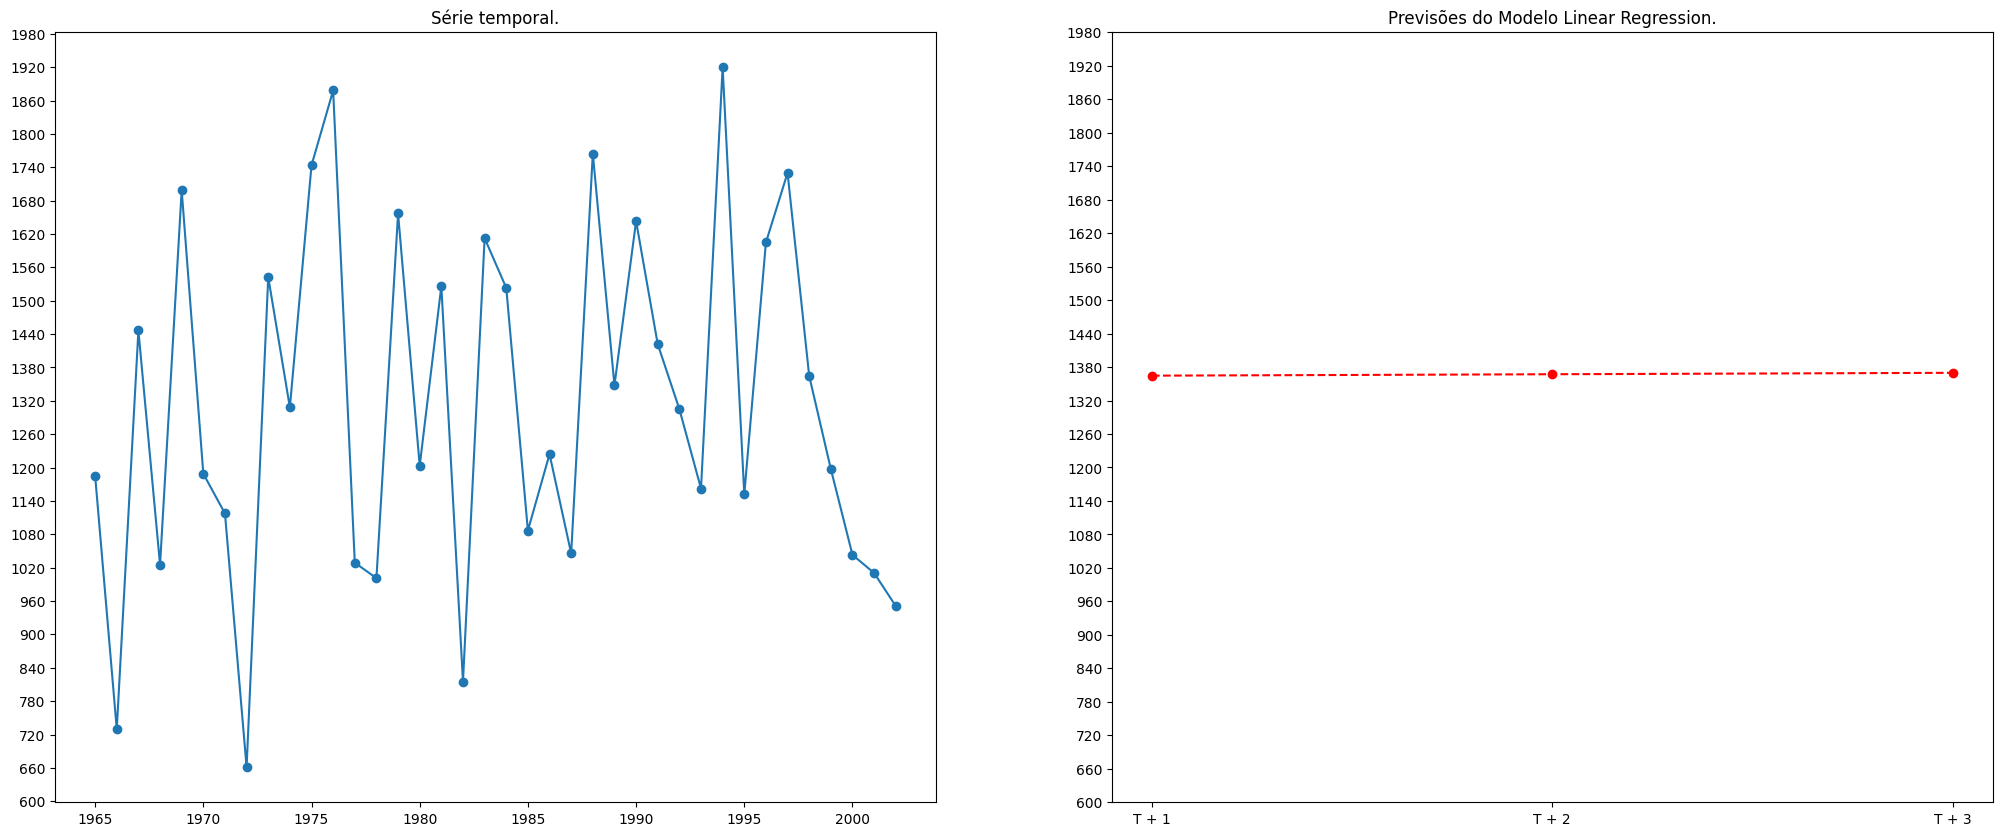

In [636]:
A = df_aux_le.iloc[:,0:(df_aux_le.shape[1] - 3)]
B = df_aux_le.iloc[:,(df_aux_le.shape[1] - 3):]
y_tick = [x for x in range(600, 2000, 60)]
x_tick = [y for y in range(1965, 2008, 10)]
fig, ax = plt.subplots(1,2,figsize=(25,10))
ax[0].plot(A.iloc[0], label='Série temporal.', marker='o')
ax[0].set_title('Série temporal.')
ax[0].set_yticks(y_tick)

ax[1].plot(B.iloc[0], label='Prévisão', color='red', marker='o', linestyle='dashed')
ax[1].set_title('Previsões do Modelo Linear Regression.')
ax[1].set_yticks(y_tick);